In [1]:
from PIL import Image
from os import listdir
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import backend as K
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
#turn image into a 1D array
def process_image(image, width):
    out = []
    for x in range(width):
        for y in range(width):
            for z in range(3): #account for RGB
                out.append(image[x][y][z])
    return np.asarray(out)

def reparameterize(W, b):
    epsilon = K.random_normal(shape = (1, hidden), mean = 0.)
    return W + K.exp(b/2) * epsilon

def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X

    hidden_state = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b)
    out = tf.nn.sigmoid(tf.matmul(hidden_state, W_prime) + b_prime)
    return out

def hidden_state(X, mask, W, b):
    tilde_X = mask * X
    
    state = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b)
    return state

def euclidean_distance(arr1, arr2):
    x = 0
    for i in range(len(arr1)):
        x += pow(arr1[i] - arr2[i], 2)
    return np.sqrt(x)

def search(image):
    hidden_states = [sess.run(hidden_state(X, mask, W, b),
                              feed_dict={X: im.reshape(1, pixels), mask: np.random.binomial(1, 1-corruption_level, (1, pixels))})
                    for im in image_set]
    query = sess.run(hidden_state(X, mask, W, b),
                              feed_dict={X: image.reshape(1,pixels), mask: np.random.binomial(1, 1-corruption_level, (1, pixels))})
    starting_state = int(np.random.random()*len(hidden_states)) #choose random starting state
    best_states = [imported_images[starting_state]]
    distance = euclidean_distance(query[0], hidden_states[starting_state][0]) #Calculate similarity between hidden states
    for i in range(len(hidden_states)):
        dist = euclidean_distance(query[0], hidden_states[i][0])
        if dist <= distance:
            distance = dist #as the method progresses, it gets better at identifying similiar images
            best_states.append(imported_images[i])
    if len(best_states)>0:
        return best_states
    else:
        return best_states[len(best_states)-101:]

In [3]:
from os import listdir
directory_name = "target"
image_names = listdir(directory_name)

In [4]:
#Script for Autoencoder
from PIL import Image
import cv2

imported_images = []

#resize all images in the dataset for processing
for image_name in image_names:
    foo = cv2.imread("target/" + image_name)
    foo = cv2.resize(foo, (115, 115))
    imported_images.append(foo)

In [5]:
image_set = np.array([process_image(image, width = 115) for image in imported_images])
print(image_set)

[[ 99  91  93 ... 102  75  91]
 [ 49 101 105 ...  97  44  79]
 [ 70  64  75 ...  38  38  38]
 ...
 [ 29  27  19 ...  85  70  46]
 [ 19  17  16 ...  31  23  13]
 [ 40  44  50 ...  87  82  89]]


In [6]:
image_width = 115
pixels = image_width * image_width * 3
hidden = 1000
corruption_level = 0.25
X = tf.placeholder("float", [None, pixels], name = 'X')
mask = tf.placeholder("float", [None, pixels], name = 'mask')

weight_max = 4 * np.sqrt(4 / (6. * (pixels + hidden)))
weight_initial = tf.random_uniform(shape = [pixels, hidden], minval = -weight_max, maxval = weight_max)

W = tf.Variable(weight_initial, name = 'W')
b = tf.Variable(tf.zeros([hidden]), name = 'b')

W_prime = tf.transpose(W)
b_prime = tf.Variable(tf.zeros([pixels]), name = 'b_prime')
out = model(X, mask, W, b, W_prime, b_prime)

cost = tf.reduce_sum(tf.pow(X-out, 2))
optimization = tf.train.GradientDescentOptimizer(0.02).minimize(cost)

x_train, x_test = train_test_split(image_set)

sess = tf.Session()
#you need to initialize all variables
sess.run(tf.global_variables_initializer())
for i in range(1):
    for start, end in zip(range(0, len(x_train), 128), range(128, len(x_train), 128)):
        input_ = x_train[start:end]
        mask_np = np.random.binomial(1, 1 - corruption_level, input_.shape)
        sess.run(optimization, feed_dict = {X: input_, mask: mask_np})
    mask_np = np.random.binomial(1, 1 - corruption_level, x_test.shape)
    print(i, sess.run(cost, feed_dict = {X: x_test, mask: mask_np}))

0 6928965600.0


In [7]:
masknp = np.random.binomial(1, 1 - corruption_level, image_set.shape)

In [8]:
image_name = "part.jpg" #Image to be used as query
image = cv2.imread(image_name)
image = cv2.resize(image, (115, 115))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
image = process_image(image, 115)

In [9]:
results = search(image)

3


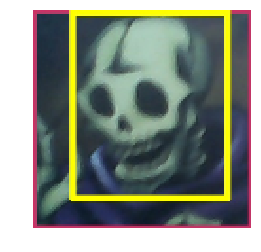

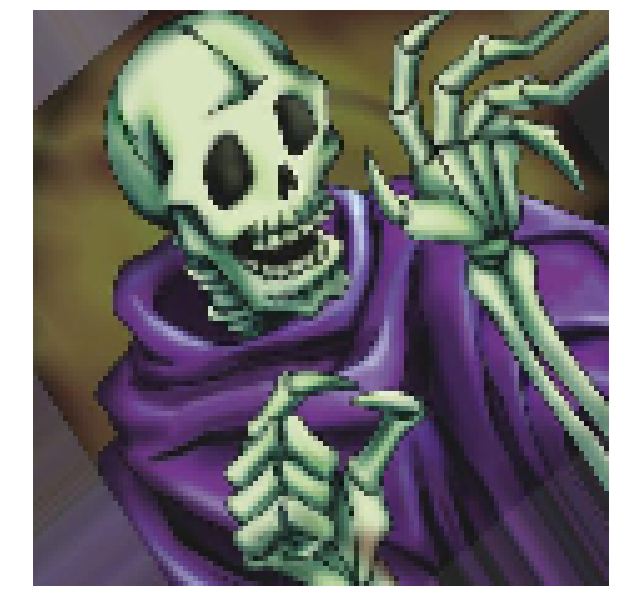

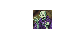

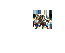

In [10]:
print(len(results))
slots = 0
plt.figure(figsize = (125,125))
for im in results[::-1]: #reads through results backwards (more similiar images first)
    plt.subplot(10, 10, slots+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.show()
    slots += 1

In [ ]:
image_name = "part.jpg" #Image to be used as query
image = cv2.imread(image_name)
image = cv2.resize(image, (115, 115))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
image = process_image(image, 115)

In [7]:
results = search(image) #Search the database using image

6


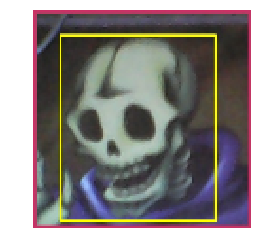

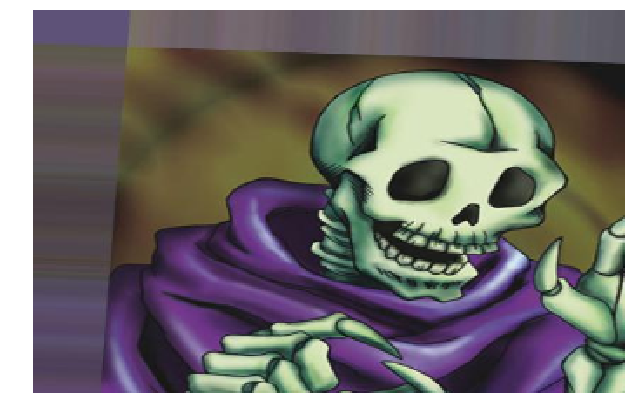

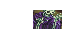

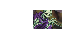

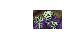

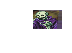

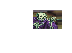

In [8]:
print(len(results))
slots = 0
plt.figure(figsize = (125,125))
for im in results[::-1]: #reads through results backwards (more similiar images first)
    plt.subplot(10, 10, slots+1) 
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    plt.show()
    slots += 1

In [27]:
image_names = ['1_0_4430.jpg', '1_0_1942.jpg', '1_0_4598.jpg', '1_0_166.jpg', '1_0_2479.jpg', '1_0_9697.jpg', '1_0_5084.jpg', '1_0_2265.jpg', '1_0_0.jpg', '1_0_3447.jpg', '1_0_5497.jpg', '1_0_818.jpg', '1_0_2691.jpg', '1_0_887.jpg', '1_0_2257.jpg', '1_0_7751.jpg', '1_0_5791.jpg', '1_0_414.jpg', '1_0_3695.jpg', '1_0_11.jpg','1_0_7075.jpg']

In [28]:
category = "knight"
for img in image_names:    
    file = open(img+'.xml','w') 
    file.write("<annotation><folder>jeux_video</folder><filename>")
    file.write(img)
    file.write("</filename><path>/home/jeanedouard-rgz/Bureau/jeux_video/"+img)
    file.write("</path><source><database>Unknown</database></source><size><width>416</width><height>416</height><depth>3</depth></size><segmented>0</segmented><object><name>")
    file.write(category)
    file.write("</name><pose>Unspecified</pose><truncated>1</truncated><difficult>0</difficult><bndbox><xmin>1</xmin><ymin>1</ymin><xmax>416</xmax><ymax>415</ymax></bndbox></object></annotation>")

    file.close() 

In [ ]:

    imported_images = []
    directory_name = "target"
    image_names = listdir(directory_name)
    #resize all images in the dataset for processing
    for image_name in image_names:
        foo = cv2.imread("target/" + image_name)
        foo = cv2.resize(foo, (115, 115))
        imported_images.append(foo)

    image_set = np.array([process_image(image, width = 115) for image in  imported_images])
    image_width = 115
    pixels = image_width * image_width * 3
    hidden = 1000
    corruption_level = 0.25
    X = tf.placeholder("float", [None, pixels], name = 'X')
    mask = tf.placeholder("float", [None, pixels], name = 'mask')
    weight_max = 4 * np.sqrt(4 / (6. * (pixels + hidden)))
    weight_initial = tf.random_uniform(shape = [pixels, hidden], minval = -weight_max, maxval = weight_max)
    W = tf.Variable(weight_initial, name = 'W')
    b = tf.Variable(tf.zeros([hidden]), name = 'b')
    W_prime = tf.transpose(W)
    b_prime = tf.Variable(tf.zeros([pixels]), name = 'b_prime')
    out = model(X, mask, W, b, W_prime, b_prime)
    cost = tf.reduce_sum(tf.pow(X-out, 2))
    optimization = tf.train.GradientDescentOptimizer(0.02).minimize(cost)
    x_train, x_test = train_test_split(image_set)
    sess = tf.Session()
    #you need to initialize all variables
    sess.run(tf.global_variables_initializer())
    for i in range(1):
        for start, end in zip(range(0, len(x_train), 128), range(128, len(x_train), 128)):
            input_ = x_train[start:end]
            mask_np = np.random.binomial(1, 1 - corruption_level, input_.shape)
            sess.run(optimization, feed_dict = {X: input_, mask: mask_np})
        mask_np = np.random.binomial(1, 1 - corruption_level, x_test.shape)
    masknp = np.random.binomial(1, 1 - corruption_level, image_set.shape)
    image_name = "card_pic/part.jpg" #Image to be used as query
    image = cv2.imread(image_name)
    image = cv2.resize(image, (115, 115))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    image = process_image(image, 115)
    results = search(image)
    slots = 0
    plt.figure(figsize = (125,125))
    for im in results[::-1]: #reads through results backwards (more similiar images first)
        plt.subplot(10, 10, slots+1) 
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
        plt.show()
        slots += 1
        image_frame[upper_left[1] : bottom_right[1], upper_left[0] : bottom_right[0]] = sketcher_rect
    os.remove("card_pic/part.jpg") 